# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [259]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
pymaceuticals = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(study_results,pymaceuticals,how='outer', on='Mouse ID' )


# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [260]:
# Checking the number of mice.
len(combined_data["Mouse ID"].value_counts())

249

In [261]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = combined_data.groupby("Mouse ID")["Timepoint"].nunique()
dupes

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [262]:
# Optional: Get all the data for the duplicate mouse ID. 


In [263]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_datav2 = combined_data.drop_duplicates(subset=['Mouse ID'])
combined_datav2.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [264]:
# Checking the number of mice in the clean DataFrame.
len(combined_datav2['Mouse ID'].value_counts())

249

## Summary Statistics

In [265]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance =combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,"Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": sem })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [266]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", 'std', 'sem','var']})

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

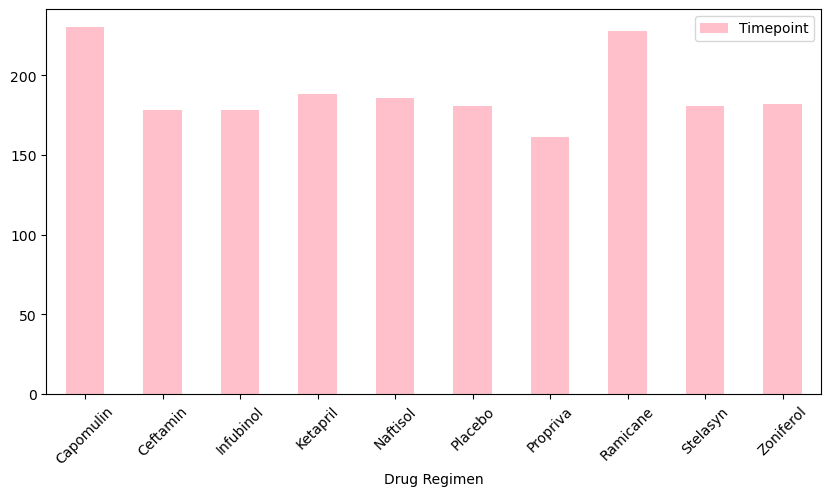

In [267]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs = combined_data.groupby('Drug Regimen')

time_p_count = pd.DataFrame(drugs["Timepoint"].count())

time_p_count.plot(kind="bar", facecolor="pink", figsize=(10,5), rot=45)


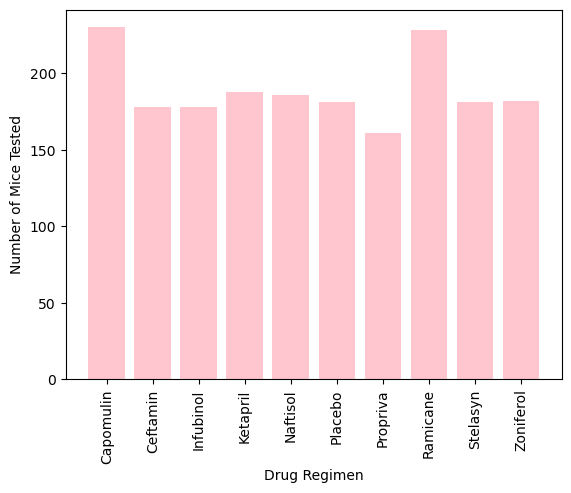

In [268]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = time_p_count.index
x_axis = time_p_count["Timepoint"]

plt.bar(list(y_axis), x_axis, alpha=0.9,color='pink', align="center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

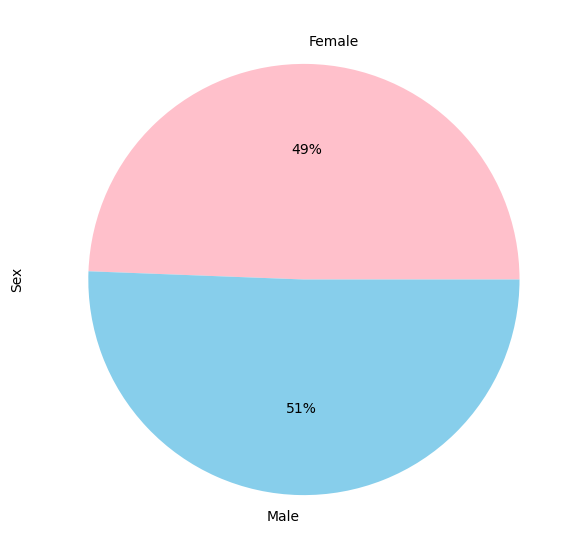

In [269]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = combined_data.groupby('Sex')
sex = pd.DataFrame(sex["Sex"].count())
colors = ["pink", "skyblue"]
explode = (0.1, 0)
sex.plot(kind='pie', y= 'Sex',autopct="%1.0f%%", legend = False, figsize=(11,7), colors=colors)

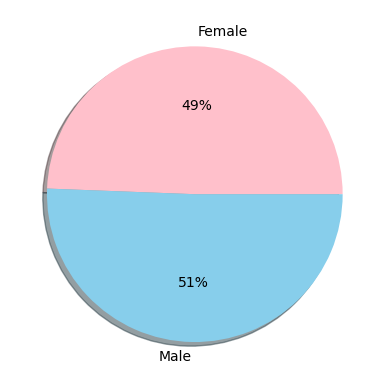

In [270]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pied = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
pie = pied["Mouse ID"]
colors = ["pink","skyblue"]
plt.pie(pie, labels=pied['Sex'], colors=colors, shadow=True, autopct="%1.0f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [271]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

maxtime = pd.DataFrame(combined_data.groupby("Mouse ID")["Timepoint"].max()).rename(columns={'Timepoint': 'max_tp'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

combined_maxtime = pd.merge(maxtime,combined_data, on=("Mouse ID"))
combined_maxtime

,Mouse ID,max_tp,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1888,z969,45,25,63.145652,2,Naftisol,Male,9,30
1889,z969,45,30,65.841013,3,Naftisol,Male,9,30
1890,z969,45,35,69.176246,4,Naftisol,Male,9,30
1891,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [272]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in drugs_list:
    
    df = combined_maxtime.loc[combined_maxtime["Drug Regimen"] == drugs]
    # add subset 
    tv_df = df.loc[df['Timepoint'] == df['max_tp']]
    
    data = tv_df['Tumor Volume (mm3)']
    drugs_data.append(data)
    
    # Determine outliers using upper and lower bounds
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{drugs}'s lower quartile: {lowerq}")
    print(f"{drugs}'s upper quartile: {upperq}")
    print(f"{drugs}'s The interquartile range: {iqr}")
    print(f"{drugs}'s The the median: {quartiles[0.5]} ")
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drugs}'s Values below {lower_bound} could be outliers.")
    print(f"{drugs}'s Values above {upper_bound} could be outliers.")
    print(" ")

Capomulin's lower quartile: 32.37735684
Capomulin's upper quartile: 40.1592203
Capomulin's The interquartile range: 7.781863460000004
Capomulin's The the median: 38.1251644 
Capomulin's Values below 20.70456164999999 could be outliers.
Capomulin's Values above 51.83201549 could be outliers.
 
Ramicane's lower quartile: 31.56046955
Ramicane's upper quartile: 40.65900627
Ramicane's The interquartile range: 9.098536719999998
Ramicane's The the median: 36.56165229 
Ramicane's Values below 17.912664470000003 could be outliers.
Ramicane's Values above 54.30681135 could be outliers.
 
Infubinol's lower quartile: 54.04860769
Infubinol's upper quartile: 65.52574285
Infubinol's The interquartile range: 11.477135160000003
Infubinol's The the median: 60.16518046 
Infubinol's Values below 36.83290494999999 could be outliers.
Infubinol's Values above 82.74144559000001 could be outliers.
 
Ceftamin's lower quartile: 48.72207785
Ceftamin's upper quartile: 64.29983003
Ceftamin's The interquartile range

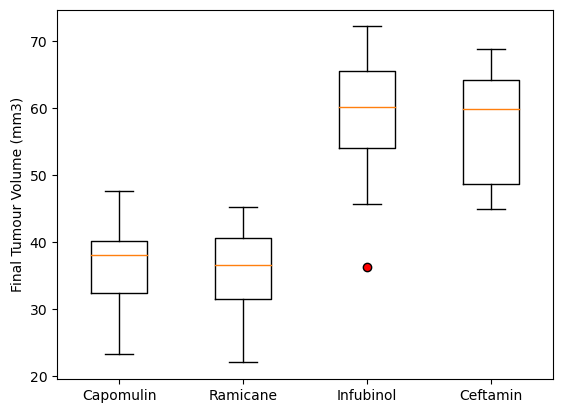

In [273]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red')
plt.boxplot(drugs_data, flierprops=flierprops)
plt.ylabel("Final Tumour Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

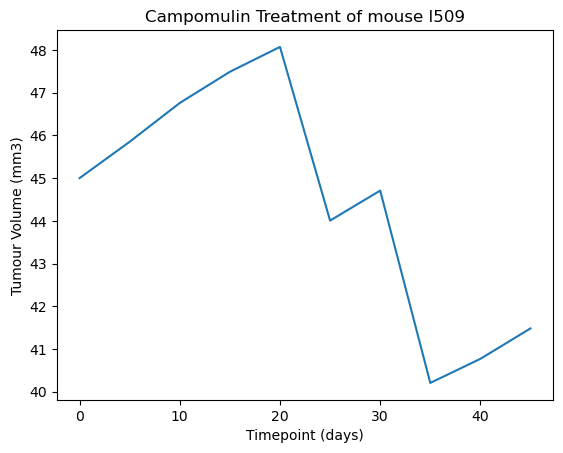

In [274]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

m = combined_data.loc[combined_data['Mouse ID'] == 'l509']
plt.plot(m['Timepoint'], m['Tumor Volume (mm3)'])
plt.ylabel("Tumour Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Campomulin Treatment of mouse l509")
plt.show()

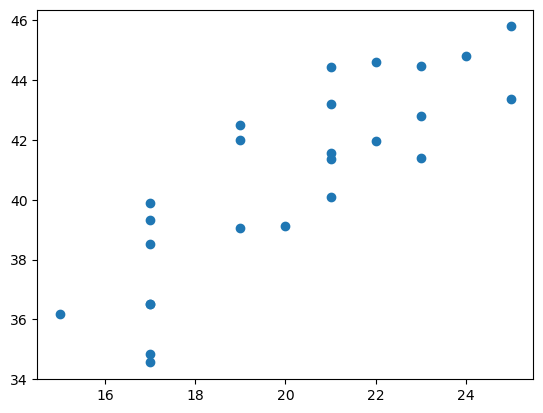

In [275]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
avg_capo = capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

plt.scatter(avg_capo["Weight (g)"],avg_capo["Tumor Volume (mm3)"] )

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


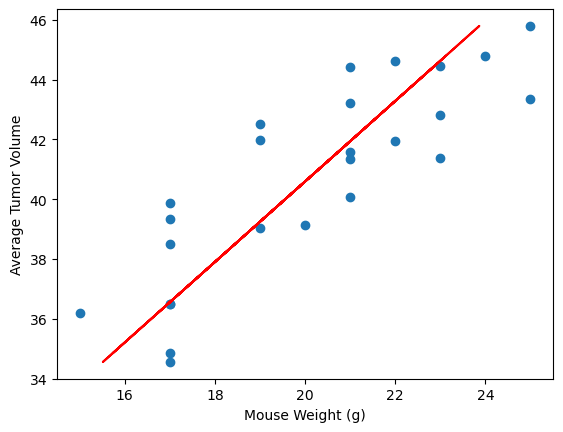

In [291]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_capo = avg_capo.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
tv = avg_capo["Tumor Volume (mm3)"]
weight = avg_capo["Weight (g)"]
correlation = st.pearsonr(tv,weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(tv, weight)
regress_values = tv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tv)
plt.plot(regress_values,tv,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()
